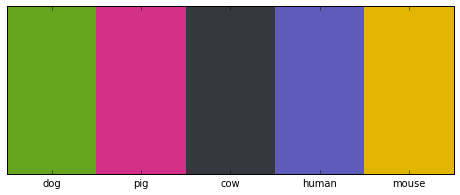

In [2]:
%matplotlib inline

import os as os
import csv as csv
import json as js
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
import collections as col
import numpy as np


workdir = '/home/pebert/work/code/mpggit'


def convert_species_colors():
    folder = os.path.join(workdir, 'crossspecies', 'graphics', 'colors')
    hex_colors_raw = os.path.join(folder, 'colors_hex.txt')
    header = ['species', 'code', 'assembly', 'hex', 'color']
    content = []
    with open(hex_colors_raw, 'r') as txt:
        rows = csv.DictReader(txt, delimiter=' ', fieldnames=header)
        for r in rows:
            content.append(r)
    converter = mpl.colors.ColorConverter()
    species = col.defaultdict(dict)
    assembly = col.defaultdict(dict)
    code = col.defaultdict(dict)
    mapping = col.defaultdict(dict)
    for entry in content:
        rgb = converter.to_rgb('#' + entry['hex'])
        species[entry['species']]['hex'] = '#' + entry['hex']
        species[entry['species']]['rgb'] = list(rgb)
        assembly[entry['assembly']]['hex'] = '#' + entry['hex']
        assembly[entry['assembly']]['rgb'] = list(rgb)
        code[entry['code']]['hex'] = '#' + entry['hex']
        code[entry['code']]['rgb'] = list(rgb)
        mapping[entry['species']]['assembly'] = entry['assembly']
        mapping[entry['species']]['code'] = entry['code']
        mapping[entry['assembly']]['species'] = entry['species']
        mapping[entry['assembly']]['code'] = entry['code']
        mapping[entry['code']]['assembly'] = entry['assembly']
        mapping[entry['code']]['species'] = entry['species']
    joined = {'species': species, 'assembly': assembly,
              'code': code, 'mapping': mapping}
    out = os.path.join(folder, 'cs_colors.json')
    if os.path.isfile(out):
        with open(out, 'r') as dump:
            check = js.load(dump)
        if check != joined:
            with open(out, 'w') as dump:
                js.dump(joined, dump, indent=1, sort_keys=True)
    return joined


def plot_colors(colors):
    
    fig, ax = plt.subplots(1, figsize=(8,3))
    label_pos = []
    labels = []
    for idx, (label, codes) in enumerate(colors.items(), start=0):
        ax.add_patch(mpatches.Rectangle((idx, 0), 1, 1, color=codes['rgb']))
        labels.append(label)
        label_pos.append(idx + 0.5)
    ax.set_xlim(0, len(colors.keys()))
    ax.set_ylim(0, 1)
    plt.xticks(label_pos, labels, rotation='0')
    plt.yticks([],[])
    plt.show()
    return


def plot_color_palette(cnames, palname, n):
    """
    """
    new_cmap = LinearSegmentedColormap.from_list(palname, cnames, N=n)
    gradient = np.linspace(0, 1, n)
    gradient = np.vstack((gradient, gradient))
    fig, ax = plt.subplots(nrows=1)
    ax.imshow(gradient, aspect='auto', cmap=new_cmap, interpolation='nearest')
    ax.set_axis_off()
    return
    

#plot_color_palette(color_list, 'blackred', 256)


res = convert_species_colors()
plot_colors(res['species'])